## Training Risk-Aware-VAE

### 1: Load MNIST as example

In [1]:
import torch
from dataset import read_mnist
from torch.utils.data import DataLoader
from utils import *

torch.manual_seed(2)

In [2]:
mnist_train, mnist_val, mnist_test = read_mnist()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

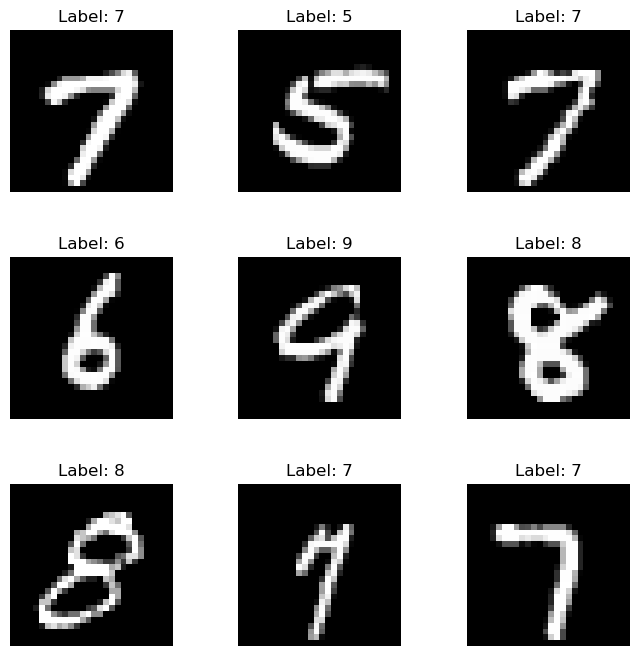

In [3]:
# some visualizations
train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))
visualize_dataset_in_grid(train_features, train_labels)

### 2: Experiments

In [4]:
from backbone import VAE, vanilla_config, two_layer_config

def train_mnist(z_dim, config, risk_aware, epochs=10, risk_q=0.5, 
                show_config=True, evaluate=True, plot=True):
    model = VAE(28 * 28, z_dim, config, device=device, risk_aware=risk_aware, 
                risk_q=risk_q)
    if show_config:
        print(model.model)
    
    model.fit(mnist_train, mnist_val, epochs=epochs)
    
    if evaluate or plot:
        b = model.batch_size
        gen_samples = generate_img(model, z_dim)
        gen_samples = gen_samples.view(b, 1, 28, 28).cpu()
        recon_samples = reconstruct_img(model, train_features.view(b, -1))
        recon_samples = recon_samples.view(b, 1, 28, 28).cpu()
        if evaluate:
            mean, var = compute_IS(gen_samples)
            print(f'Inception Score: Mean: {mean}, Variance: {var}')
            fid = compute_FID(train_features, recon_samples)
            print(f'Frechet Inception Distance: {fid}')
        if plot:
            grid_show(gen_samples)
            plt.show()
            grid_show(torch.cat((train_features, recon_samples), 3))
            plt.show()
    
    return model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:22<00:00, 33.55it/s]


Epoch: 1, train loss: 179.6962, dev loss: 164.9757


C:\Users\Hao\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score: Mean: 1.7009655237197876, Variance: 0.360891193151474
Frechet Inception Distance: 0.41322508454322815


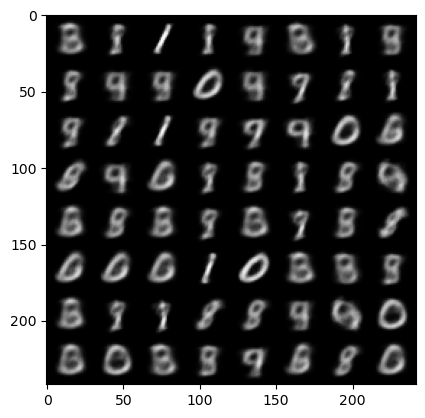

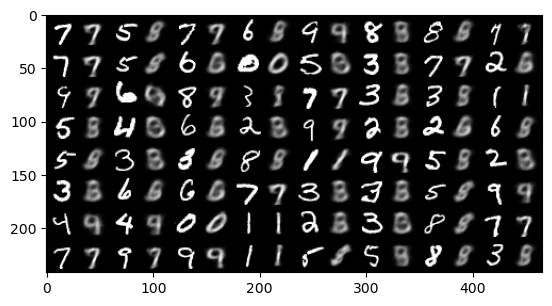

In [5]:
vae_model = train_mnist(2, two_layer_config, risk_aware="neutral", epochs=1)

### 3: Risk Aware VAE not tested

below are the experiments from the old model setup

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 87.00it/s]


Epoch: 1, train loss: 139.6798, dev loss: 123.5515


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 83.32it/s]


Epoch: 2, train loss: 119.2660, dev loss: 116.5811


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 76.62it/s]


Epoch: 3, train loss: 113.3762, dev loss: 112.3407


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 72.92it/s]


Epoch: 4, train loss: 109.8430, dev loss: 108.9664


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 78.11it/s]


Epoch: 5, train loss: 107.5455, dev loss: 107.0992


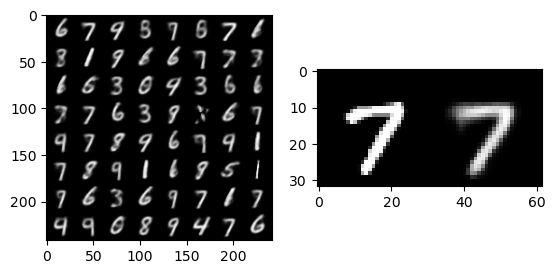

In [6]:
vae_rs = train_mnist(2, two_layer_config, risk_aware="seeking", epochs=5)

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 86.72it/s]


Epoch: 1, train loss: 212.7552, dev loss: 195.3021


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 85.62it/s]


Epoch: 2, train loss: 191.8712, dev loss: 189.4563


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 76.50it/s]


Epoch: 3, train loss: 188.0991, dev loss: 187.3712


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 76.26it/s]


Epoch: 4, train loss: 185.7132, dev loss: 185.1138


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 73.55it/s]


Epoch: 5, train loss: 183.3956, dev loss: 183.0772


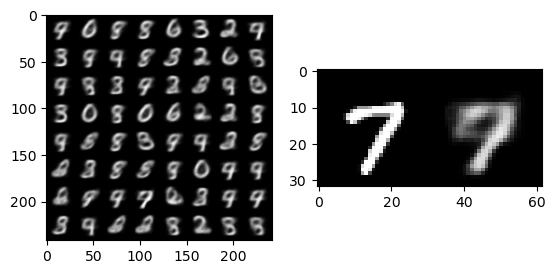

In [7]:
vae_ra = train_mnist(2, two_layer_config, risk_aware="abiding", epochs=5)